# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in machine learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of machine learning. 🤖📈



In [1]:
# Import necessary libraries
import torch # Deep learning
from torchvision import datasets, transforms # manages datasets and applies data transformations
from torch.utils.data import DataLoader #

# TODO: Define a transform to normalize the data
transform = transforms.Compose([
    # TODO: Add necessary transformations
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 114240642.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45522620.75it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32010013.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11899143.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# TODO: Figure out how many images are in the train_set and test_set.
num_train_images = len(train_set)
num_test_images = len(test_set)

print(f"Number of images in the training set: {num_train_images}")
print(f"Number of images in the test set: {num_test_images}")

Number of images in the training set: 60000
Number of images in the test set: 10000


In [ ]:
len(train_loader)*64 == num_train_images

False

In [ ]:
len(train_loader)*64

60032

## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [3]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28*28, 10) # First fully connected layer
        #self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)  # TODO: add an activation function
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [4]:
# TODO: Define the neural network class
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28*28, 1024) # First fully connected layer
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = ComplexNet()
print(model)

ComplexNet(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [6]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# TODO: Set the number of epochs
num_epochs = 10

hist_training_loss = []
hist_test_loss = []
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward() # computes gradients
        optimizer.step() # adjust the weights

        running_loss += loss.item()

    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    hist_training_loss.append(running_loss)
    # TODO: evaluate on the test_loader
    test_loss = 0.0
    with torch.no_grad(): # don't compute any gradients
      for images, labels in test_loader:
          # TODO: Complete evaluation pass
          outputs = model(images)
          tloss = criterion(outputs, labels)

          test_loss += tloss.item()

      else:
          print(f" Loss: {test_loss/len(test_loader)}")
      hist_test_loss.append(test_loss)

print("Training is finished!")

Epoch 1, Loss: 0.07756431752454433
 Loss: 0.09350615588853219
Epoch 2, Loss: 0.07325613796006022
 Loss: 0.09455413277969832
Epoch 3, Loss: 0.06956189038204168
 Loss: 0.09396852115777196
Epoch 4, Loss: 0.06554414318111945
 Loss: 0.08591212324648324
Epoch 5, Loss: 0.06211820660359554
 Loss: 0.0840005225280988
Epoch 6, Loss: 0.0588634946415308
 Loss: 0.08348668160682224
Epoch 7, Loss: 0.055765645577262504
 Loss: 0.08648116661200098
Epoch 8, Loss: 0.05306651156647865
 Loss: 0.0870113369695854
Epoch 9, Loss: 0.05036424004660447
 Loss: 0.077600896188316
Epoch 10, Loss: 0.0480703899650765
 Loss: 0.07738948341720044
Training is finished!


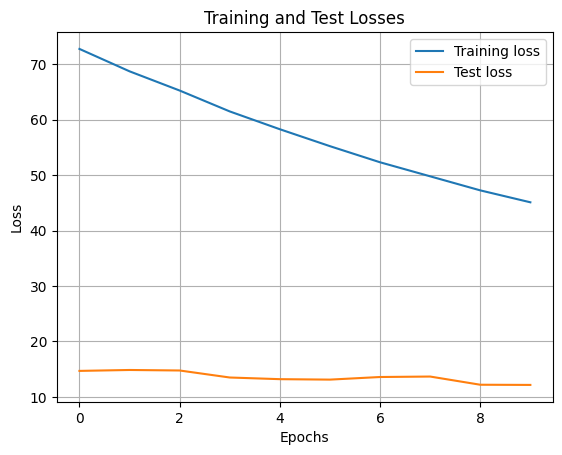

In [8]:
# TODO: plot the model complexity graph
import matplotlib.pyplot as plt
import numpy as np
epoch_list = np.arange(10)
plt.plot(epoch_list, hist_training_loss, label='Training loss')
plt.plot(epoch_list, hist_test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.title('Training and Test Losses')
plt.show()

### TODO1: Comment the model complexity graph
### TODO2: Change the model and add more layer (use a complex model)

## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [ ]:
# TODO: Complete this code to implement Early stopping
patience = 10
min_delta = 0.001
best_loss = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
  # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(test_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 0.006952172780691434, Validation Loss: 0.007778319530189037
Epoch 2, Training Loss: 0.006660588943748983, Validation Loss: 0.005363508127629757
Epoch 3, Training Loss: 0.006419176367568974, Validation Loss: 0.0002591797965578735
Epoch 4, Training Loss: 0.006225304832599605, Validation Loss: 0.0007458649924956262
Epoch 5, Training Loss: 0.005959010555507935, Validation Loss: 0.004384078551083803
Epoch 6, Training Loss: 0.005763002609060124, Validation Loss: 0.000841094646602869
Epoch 7, Training Loss: 0.005587276682754217, Validation Loss: 0.008742477744817734
Epoch 8, Training Loss: 0.005434422572457374, Validation Loss: 0.0010890306439250708
Epoch 9, Training Loss: 0.005314117106400541, Validation Loss: 0.0052282921969890594
Epoch 10, Training Loss: 0.005094077104539014, Validation Loss: 0.008433264680206776
Epoch 11, Training Loss: 0.0049276709868747645, Validation Loss: 0.003075036220252514
Epoch 12, Training Loss: 0.004825754665137544, Validation Loss: 0.003

In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ?
min_delta : the minimum change in_ the validation loss to be considered as_ an improvement.
patience : number of epochs with_ no improvement after which training will be stopped.
# What is different from the first training ?


## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [9]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout()  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout()  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
# TODO: Train the dropout model
num_epochs = 10

for epoch in range(num_epochs):
    model_with_dropout.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_with_dropout(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")

print("Training is finished!")


Epoch 1/10, Loss: 2.2916417121887207
Epoch 2/10, Loss: 2.3250110149383545
Epoch 3/10, Loss: 2.3284852504730225
Epoch 4/10, Loss: 2.286128044128418
Epoch 5/10, Loss: 2.369535446166992
Epoch 6/10, Loss: 2.352444648742676
Epoch 7/10, Loss: 2.343132734298706
Epoch 8/10, Loss: 2.317487955093384
Epoch 9/10, Loss: 2.2818164825439453
Epoch 10/10, Loss: 2.3554162979125977
Training is finished!


## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
